# HW3 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/12 (Tues)  11:59 AM [Before Class Start]

## Notice Class schedule
<table>
  <tr>
    <th>Date</th>
    <th>Desc.</th>
  <tr>
    <td>5/29</td>
    <td>MID-TERM EXAM & HW#3 Start Date</td>
  </tr>
  <tr>
    <td>5/31</td>
    <td>HW#2 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/12</td>
    <td>HW#3 Due Date & HW#4(Project) Start Date</td>
  </tr>
  <tr>
    <td>6/19</td>
    <td>HW#3 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/21</td>
    <td>FINAL EXAM(NOT FIXED)</td>
  </tr>
  <tr>
    <td>6/26</td>
    <td>HW#4(Project) Due Date(NO LATE HAND-IN)</td>
  </tr>
</table>

## Assignment Credit

### Your assignments are 30% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 7%__
- __HW#3: 8%__
- __HW#4(Project): 10%__

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Problem 1-1 Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- Apply regression model for 2000-2015 data only.
- You should use same datasets in HW#2[infant mortality rate and GDP]
- xData : GDP per capita
- yData : Infant morality rate 
- Please print __MSE__ of implemented model.

In [2]:
#load data and filtering data (2000-2015) you can use HW#2 preprocessing code

###YOUR CODE HERE###
#GDP
gdp = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 
gdp=gdp.iloc[:, 24:40]

nan_index=[]
nan_country=[]

for columnNum in [str(num) for num in range(2000,2016)]:
    for rowNum in range(0, len(gdp[columnNum])):
        if (type(gdp[columnNum][rowNum])==float): 
            nan_index.append(rowNum)
        else:
            gdp[columnNum][rowNum] = gdp[columnNum][rowNum].replace(',', '')

gdp=gdp.astype(np.float64)

nan_index = list(set(nan_index))
for drop_index in nan_index:
    nan_country.append(gdp.index[drop_index])

for drop_country in nan_country:
    index_num=0
    while index_num < len(gdp.index):
        if(drop_country==gdp.index[index_num]):
            gdp=gdp.drop(gdp.index[index_num])
            break
        else:
            index_num=index_num+1
            
gdp=gdp.astype(np.int64)
num=0
while num < 15:
    temp_list=gdp.columns[num:num+5]
    gdp[str(gdp.columns[num])+'-'+str(gdp.columns[num+5])] = gdp[temp_list].median(axis=1)
    num=num+5
    
gdp=gdp.astype(np.int64).iloc[:, 16:19]

#IM
im = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)
IM_col=list(im.columns)
im.drop(list(set(IM_col) - set(['2000-2005', '2005-2010', '2010-2015'])), axis=1, inplace=True)

In [3]:
lr = LinearRegression()

xData=[]
yData=[]

#TODO
diff_IMtsv_country = ['South Korea', 'Iran', 'Bahamas', 'Gambia', 'Congo', 'Congo_DR']
diff_GDPtsv_country = ['Korea', 'Islamic Republic of Iran', 'The Bahamas', 'The Gambia', 'Republic of Congo', 'Democratic Republic of the Congo']
filtered_country = []

IMtsv_idx = []
GDPtsv_idx = []

for n1 in range(0, len(im.index)):
    for n2 in range(0, len(gdp.index)):
        if(im.index[n1] == gdp.index[n2]):
            IMtsv_idx.append(n1)
            GDPtsv_idx.append(n2)
            filtered_country.append(im.index[n1])
            break
            
#concat 2000-2005 / 2005-2010 / 2010-2015
xData=gdp.loc[filtered_country+diff_GDPtsv_country,'2000-2005'].append(gdp.loc[filtered_country+diff_GDPtsv_country,'2005-2010'], ignore_index=True)
yData=im.loc[filtered_country+diff_IMtsv_country,'2000-2005'].append(im.loc[filtered_country+diff_IMtsv_country,'2005-2010'], ignore_index=True)
xData=xData.append(gdp.loc[filtered_country+diff_GDPtsv_country,'2010-2015'], ignore_index=True)
yData=yData.append(im.loc[filtered_country+diff_IMtsv_country,'2010-2015'], ignore_index=True)

xData=pd.DataFrame(xData)
yData=pd.DataFrame(yData)

lr.fit(xData, yData)
print ("MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData))

xData_ = xData.copy()


MSE - scikit learn linear regression:  621.755043065184


### Problem 1-2 Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [4]:
#TODO: import api(s) to implement the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for deg in range(10):
    xData = xData_.copy()
    PolynomialRegression = PolynomialFeatures(deg)
    plr = make_pipeline(PolynomialRegression, LinearRegression(normalize=True))
    plr.fit(xData,yData)
    print ("MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(xData), yData))


MSE - poly-linear regression; degree= 0 :  852.8537330502477
MSE - poly-linear regression; degree= 1 :  621.755043065184
MSE - poly-linear regression; degree= 2 :  519.9415534653124
MSE - poly-linear regression; degree= 3 :  439.46053830648964
MSE - poly-linear regression; degree= 4 :  396.2230385428836
MSE - poly-linear regression; degree= 5 :  358.2479234122755
MSE - poly-linear regression; degree= 6 :  336.1316519355515
MSE - poly-linear regression; degree= 7 :  322.4089324723174
MSE - poly-linear regression; degree= 8 :  313.0155857884846
MSE - poly-linear regression; degree= 9 :  307.60019879094847


### Problem 1-3 The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

### YOUR ANSWER HERE ###



Data set을 모두 training에만 사용하고 test set이 따로 없기 때문에 모델이 제대로 결과를 내는지 정확히 확인할 수 없다.

### Problem 1-4 To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [5]:
#TODO: import API for deviding training and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData_,yData,test_size=0.20)

for deg in range(10):
    PolynomialRegression = PolynomialFeatures(deg)
    plr = make_pipeline(PolynomialRegression, LinearRegression(normalize=True))
    plr.fit(x_train,y_train)
    print ("MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val))

MSE - sklearn poly-linear regression; degree= 0 
	train:  883.4163449609551 ,	val:  732.6437481241513
MSE - sklearn poly-linear regression; degree= 1 
	train:  631.4476238096815 ,	val:  586.3062382557833
MSE - sklearn poly-linear regression; degree= 2 
	train:  526.6129835817242 ,	val:  496.74641099234907
MSE - sklearn poly-linear regression; degree= 3 
	train:  444.1922908651804 ,	val:  424.02229643329224
MSE - sklearn poly-linear regression; degree= 4 
	train:  400.70639390095636 ,	val:  382.3037155713534
MSE - sklearn poly-linear regression; degree= 5 
	train:  365.4736192573677 ,	val:  332.7746424132256
MSE - sklearn poly-linear regression; degree= 6 
	train:  344.08922763456195 ,	val:  307.4507323838363
MSE - sklearn poly-linear regression; degree= 7 
	train:  328.6651601076945 ,	val:  300.22850802916446
MSE - sklearn poly-linear regression; degree= 8 
	train:  317.86958745004904 ,	val:  296.70017587542384
MSE - sklearn poly-linear regression; degree= 9 
	train:  312.0046768166216

### Problem 1-5 We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so. 
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

### YOUR ANSWER HERE ###

국가 별 보건의료자원 통계 자료를 활용할 수 있다.
영유아의 위급상황에 대처할 수 있는 보건의료자원(인구 대비 의사/간호사 수,  병원 수 등)이 잘 갖춰진 나라는
영유아 사망률이 적을 것이고 그렇지 못한 나라(영유아의 작은 질병에도 제대로 대처할 수 없는 나라)는 영유아 사망률이 높을 것이다.

http://www.khidi.or.kr/board/view?pageNum=1&rowCnt=10&no1=493&linkId=210181&menuId=MENU01144&maxIndex=00002101819998&minIndex=0000
(OECD Health Statistics)

## Problem2. Regression Model
## -Amzon stock price prediction.

### Problem 2-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [4]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('AMZN.csv')

In [6]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [8]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [9]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    for idx in range(len(raw_data.index)-lookback):
        temp = []
        for num in range(lookback):
            temp.append(raw_data[col_name].values[idx+num])
        x_datas.append(temp)
        y_datas.append(raw_data[col_name].values[idx+lookback])

   ##########################    
    #x_data = np.concatenate(x_datas,0)
    x_data = np.asarray(x_datas)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [10]:
"""
TODO : make split_data function which split train / test (8/2 rate)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (8/2 rate)\n\n@Function\nsplit_data\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [11]:
def split_data(x,y):
    ##### Your Code Here ####
    split_point = int(len(x)*0.8)
    splited_x = np.split(x, [split_point], axis=0)
    splited_y = np.split(y, [split_point], axis=0)
    
    x_train = splited_x[0]
    x_test = splited_x[1]
    y_train = splited_y[0]
    y_test = splited_y[1]
    
    ###########################
    return x_train, x_test, y_train, y_test

In [12]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [13]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4226, 5), (4226,), (1057, 5), (1057,))

### <br/>Problem 2-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [14]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
    PolynomialRegression = PolynomialFeatures(poly_degree)
    model = make_pipeline(PolynomialRegression, LinearRegression(normalize=True))
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)    

    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(x_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(x_test), y_test))
    
    return test_pred, y_test

In [16]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Low', lookback_days=9, poly_degree=4)

MSE - Train 3.5054
MSE - Test 511757379.0170


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable : **Low**      <br/>
Lookback : **9**      <br/>
Poly_degree : **4**      <br/>

### Problem 2-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

1. underfitting: 모델이 너무 단순하여 training data에 대해서도 좋은 성능을 내지 못함 bias가 높음
   overfitting: training data를 너무 과도하게 학습해서 training data에 대해서만 좋은 성능을 내고 유연성이 떨어지는 모델 variance가 높음
   <u>ex) poly_degree가 0이고 lookback이 10이하로 작은 경우</u>
2. train MSE를 적게 내는것만을 목표로하면 overfitted model이 나올 가능성이 높다. 
   이러한 모델은 test 데이터에 대해선 MSE가 굉장히 높게 나올 수 있다.
   <u>ex) 위와 같이 poly_degree가 4이상으로 높은 경우</u>

### Problem 2-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [17]:
# TODO : Assign your best prediction for test data to best_pred

best_pred, y_test = run_regression(raw_data, column_name='High', lookback_days=650, poly_degree=1)

MSE - Train 5.8158
MSE - Test 210.9180


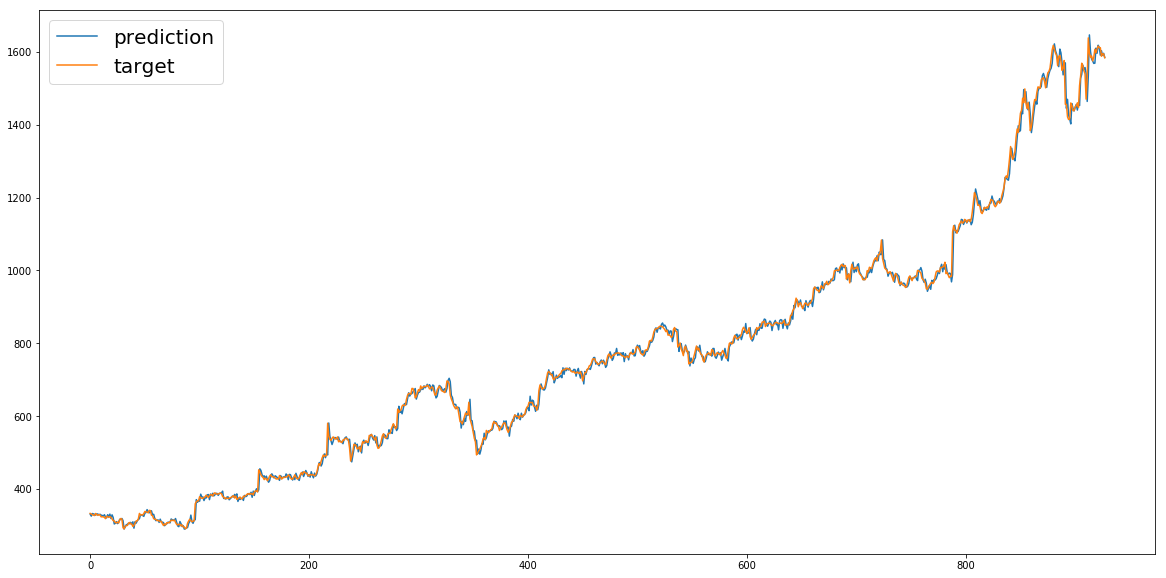

In [18]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem3. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3-1 Load Data
- Load amazon_cells_labelled.tsv and make pandas dataframe.

In [20]:
amazon_review = pd.read_csv('amazon_cells_labelled.tsv',sep='\t')
amazon_review.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Problem 3-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [23]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amajon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    ###YOUR CODE HERE###
    review_list = list(amazon_review['Review'][:])
    vectorizer.fit(review_list)
    x = vectorizer.transform(review_list)
    bow = x.toarray()

    return vectorizer, bow

In [24]:
vectorizer, bow = make_review_bow(amazon_review)
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [25]:
###YOUR CODE HERE###
from sklearn.model_selection import ShuffleSplit

#X concat Y --> bow1
concat_bow_y = list()
for idx in range(len(bow)):
    concat_bow_y.append(list(np.append(bow[idx], [amazon_review['Sentiment'][idx]])))
concat_bow_y = np.asarray(concat_bow_y)

bow1 = np.copy(concat_bow_y)

#ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=.2, random_state=10)
for train_index, test_index in cv.split(bow1):
    test_arr = np.copy(bow1[test_index])
    train_arr = np.copy(bow1[train_index])

#train_set / test_set
testX = list()
testY = list()
trainX = list()
trainY = list()
for idx in range(len(test_arr)):
    temp1 = list(np.split(test_arr[idx], [1847], axis = 0)[0])
    temp2 = list(np.split(test_arr[idx], [1847], axis = 0)[1])
    testX.append(temp1)
    testY.append(temp2[0])
    
for idx in range(len(train_arr)):
    temp1 = list(np.split(train_arr[idx], [1847], axis = 0)[0])
    temp2 = list(np.split(train_arr[idx], [1847], axis = 0)[1])
    trainX.append(temp1)
    trainY.append(temp2[0])

testX = np.asarray(testX)
testY = np.asarray(testY)
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)

### Problem 3-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [26]:
from sklearn.linear_model import SGDClassifier

In [27]:
###YOUR CODE HERE###
sgdClf = linear_model.SGDClassifier()
sgdClf.fit(trainX, trainY)

#print(clf.score(testX, testY))
#print(clf.predict([[[-0.8, -1]]]))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
sgdScore = sgdClf.score(testX, testY)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.790000


### Problem 3-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
###YOUR CODE HERE###

nbClf = MultinomialNB()
nbClf.fit(trainX, trainY)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
nbScore = nbClf.score(testX, testY)
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.820000


### Problem 3-6 Select the Best Model with 5 fold Cross Validation
- Split your data (1000 reviews) __Train: 600 / Validation: 200 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Choose model you want to use(SGD or NB or both) and give us reason why you choose it.
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

In [32]:
#Split Data
###YOUR CODE HERE###
cv_tt = ShuffleSplit(n_splits=1, test_size=.2, random_state=12) #1000 -> 8:2 
bow2 = np.copy(concat_bow_y)

for train_index, test_index in cv_tt.split(bow2):
    test_ = np.copy(bow2[test_index])
    train_ = np.copy(bow2[train_index]) #train:test = 8:2  (train  = train + validation)

print(len(test_))
print(len(train_))

test_.shape

200
800


(200, 1848)

### YOUR ANSWER HERE [reason why you choose that model] ###


**MultinomialNB**<br>
여러 단어에 대해 각 단어별 출연 여부로 sentiment를 결정하는 모델에선 linear model기반보단<br>
각 항목에 대해 어디에 속할 확률이 높은지 계산하는 Naive Bayes model이 더 적합하다고 생각했다.

In [33]:
###YOUR CODE HERE###
#Split array -> X: bow_df / Y: Sentiment
testX_ = list()
testY_ = list()
trainX_ = list()
trainY_ = list()

for idx in range(len(test_)):
    temp1 = list(np.split(test_[idx], [1847], axis = 0)[0])
    temp2 = list(np.split(test_[idx], [1847], axis = 0)[1])
    testX_.append(temp1)
    testY_.append(temp2[0])
    
for idx in range(len(train_)):
    temp1 = list(np.split(train_[idx], [1847], axis = 0)[0])
    temp2 = list(np.split(train_[idx], [1847], axis = 0)[1])
    trainX_.append(temp1)
    trainY_.append(temp2[0])

testX_ = np.asarray(testX_)
testY_ = np.asarray(testY_)
trainX_ = np.asarray(trainX_)
trainY_ = np.asarray(trainY_)

print(trainX_.shape)
print(trainY_.shape)
print(testX_.shape)
print(testY_.shape)

(800, 1847)
(800,)
(200, 1847)
(200,)


In [34]:
###YOUR CODE HERE###
#from sklearn.metrics import r2_score
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

model = MultinomialNB()
param_range = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
gs = GridSearchCV(estimator=model, param_grid=param_range, scoring='accuracy', cv=5, n_jobs=1)
gs.fit(trainX_, trainY_)

print(gs.cv_results_["mean_test_score"])
print ("best parameter",gs.best_params_)

[0.76    0.7625  0.77375 0.78625 0.80125 0.77125 0.68875 0.57   ]
best parameter {'alpha': 1.0}


In [35]:
score = gs.score(testX_, testY_)
print ("Model Accuracy: %f" % score)

Model Accuracy: 0.820000


## Problem4. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

### Problem 4-1 Pick 3 Categories you want and download

In [2]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""              
categories = ['sci.space',
              'soc.religion.christian',
              'talk.politics.guns'
                    ]

In [3]:
dataset = fetch_20newsgroups(subset='test', categories=categories,
                             shuffle=True, random_state=45)
print("%s" % dataset.description)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print(categories)

the 20 newsgroups by date dataset
1156 documents
3 categories
['sci.space', 'soc.religion.christian', 'talk.politics.guns']


### Problem 4-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset.data)
tfidf_matrix

<1156x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 129960 stored elements in Compressed Sparse Row format>

### Problem 4-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

In [5]:
num_clusters = 3
km = KMeans(n_clusters = num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
print(clusters[:10])

[1, 1, 0, 0, 0, 2, 1, 2, 2, 0]


### Problem 4-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [6]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

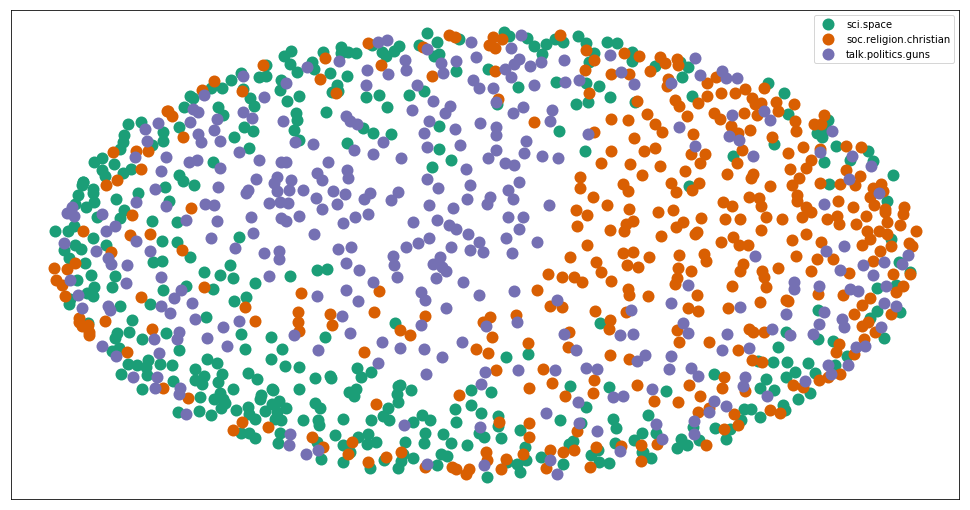

In [7]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name], 
                color= cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)